<a href="https://colab.research.google.com/github/Ritesh-panda/datascience-learnings/blob/main/feature_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [ ]:
df= pd.read_csv('/content/Churn_Modelling (1).csv')

In [ ]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9281 non-null   object 
 6   Age              9078 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
#droping the columns that we dont need
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           9281 non-null   object 
 3   Age              9078 non-null   float64
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [ ]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.Gender.value_counts()

,count
Gender,
Male,5060
Female,4221


handling missing values in the gender cat


In [ ]:
df.Gender.mode()

,Gender
0,Male


In [ ]:
df.Gender.fillna('Male',inplace=True)

/tmp/ipython-input-1601951011.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Gender.fillna('Male',inplace=True)


In [ ]:
df.Gender.value_counts()

,count
Gender,
Male,5779
Female,4221


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              9078 non-null   float64
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [ ]:
df.Age.value_counts()

,count
Age,
37.0,433
38.0,422
35.0,420
36.0,416
33.0,409
...,...
84.0,2
82.0,1
88.0,1


In [ ]:
df.Age.median()

37.0

In [ ]:
df.Age.mean()

np.float64(38.93005067195418)

### Checking Skewness Numerically

The `skew()` method from pandas calculates the skewness of a series. A value of 0 indicates no skewness (perfectly symmetrical distribution). Positive values indicate right-skewness (tail on the right), and negative values indicate left-skewness (tail on the left).

In [ ]:
import pandas as pd

# Calculate skewness for the 'Age' column
age_skewness = df['Age'].skew()
print(f"Skewness of 'Age' column: {age_skewness:.2f}")

# You can also calculate skewness for all numerical columns
# numerical_cols_skewness = df.select_dtypes(include=np.number).skew()
# print("\nSkewness for all numerical columns:\n", numerical_cols_skewness)

Skewness of 'Age' column: 1.02


### Checking Skewness Visually with a Histogram

A histogram is a great way to visually inspect the distribution of a numerical variable and observe its skewness. I'll use `seaborn` for a clear visualization.

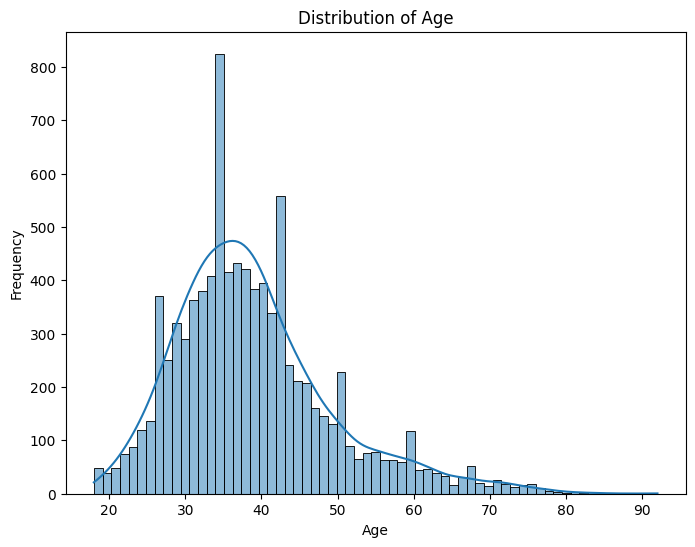

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Handling Missing Values in 'Age' Column

Since the 'Age' column has a right-skewed distribution (skewness = 1.02), using the median for imputation is generally preferred over the mean, as the median is less sensitive to outliers and skewed data.

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  float64
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


/tmp/ipython-input-3787586473.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [ ]:
from sklearn import preprocessing

le= preprocessing.LabelEncoder()
df['Gender_lable']=le.fit_transform(df.Gender.values)
df['Geography_lable']=le.fit_transform(df.Geography.values)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_lable,Geography_lable
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1,0,0
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0,0,2
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1,0,0
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0,0,2


one hot encoding technique


In [ ]:
one_hot=pd.get_dummies(df.Geography)

In [ ]:
df.Geography.value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df.one_hot.value_counts()# this error is because we havent enterd the value in the table

AttributeError: 'DataFrame' object has no attribute 'one_hot'

In [ ]:
one_hot
#here true=1 fales=0

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9995,True,False,False
9996,True,False,False
9997,True,False,False
9998,False,True,False


In [ ]:
df_dummies=pd.get_dummies(df)

In [ ]:
df_dummies.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_lable,Geography_lable,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42.0,2,0.00,1,1,1,101348.88,1,0,0,True,False,False,True,False
1,608,41.0,1,83807.86,1,0,1,112542.58,0,0,2,False,False,True,True,False
2,502,42.0,8,159660.80,3,1,0,113931.57,1,0,0,True,False,False,True,False
3,699,39.0,1,0.00,2,0,0,93826.63,0,0,0,True,False,False,True,False
4,850,43.0,2,125510.82,1,1,1,79084.10,0,0,2,False,False,True,True,False
